In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
# Excel ki file read karna ka liya 
df = pd.read_excel("my_iris (2).xlsx")
df

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,0,NaN,NaN,NaN,NaN,10.2,-7.0,5.6,-0.8,Iris-setosa
1,1,4.9,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,Iris-setosa
2,2,4.7,3.2,NaN,NaN,9.4,-6.4,5.2,-0.8,Iris-setosa
3,3,4.6,NaN,1.5,NaN,9.2,-6.2,6.0,-0.8,Iris-setosa
4,4,NaN,3.6,NaN,NaN,10.0,-7.2,5.6,-0.8,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,13.4,-6.0,20.8,-9.2,Iris-virginica
146,146,6.3,2.5,5.0,1.9,12.6,-5.0,20.0,-7.6,Iris-virginica
147,147,6.5,3.0,5.2,2.0,13.0,-6.0,20.8,-8.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,12.4,-6.8,21.6,-9.2,Iris-virginica


In [3]:
# filteration ka liya har col ka null entries count kr rha hain 
nullval = df.isnull().sum()
print("No. of null values in each column:")
print(nullval)

No. of null values in each column:
Unnamed: 0         0
sepal depth       20
sepal diameter    20
petal depth       20
petal diameter    50
sepal length       0
sepal width        0
petal length       0
petal width        0
target             0
dtype: int64


In [4]:
## sab cols ka mean la liya in order to fill the null values with their mean except the target col because it ius dependent 
mean = df[['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length', 'petal width']].mean()
print(mean)

sepal depth        5.901538
sepal diameter     3.005385
petal depth        4.115385
petal diameter     1.453000
sepal length      11.686667
sepal width       -6.108000
petal length      15.034667
petal width       -4.794667
dtype: float64


In [5]:
# Fill null values with mean of respective columns
df[['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length', 'petal width']] = df[['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length', 'petal width']].fillna(mean)
df

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,0,5.901538,3.005385,4.115385,1.453,10.2,-7.0,5.6,-0.8,Iris-setosa
1,1,4.900000,3.000000,1.400000,0.200,9.8,-6.0,5.6,-0.8,Iris-setosa
2,2,4.700000,3.200000,4.115385,1.453,9.4,-6.4,5.2,-0.8,Iris-setosa
3,3,4.600000,3.005385,1.500000,1.453,9.2,-6.2,6.0,-0.8,Iris-setosa
4,4,5.901538,3.600000,4.115385,1.453,10.0,-7.2,5.6,-0.8,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
145,145,6.700000,3.000000,5.200000,2.300,13.4,-6.0,20.8,-9.2,Iris-virginica
146,146,6.300000,2.500000,5.000000,1.900,12.6,-5.0,20.0,-7.6,Iris-virginica
147,147,6.500000,3.000000,5.200000,2.000,13.0,-6.0,20.8,-8.0,Iris-virginica
148,148,6.200000,3.400000,5.400000,2.300,12.4,-6.8,21.6,-9.2,Iris-virginica


In [6]:
# Unnamed col useless ka jo ka bas Index da rha no need 
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,5.901538,3.005385,4.115385,1.453,10.2,-7.0,5.6,-0.8,Iris-setosa
1,4.900000,3.000000,1.400000,0.200,9.8,-6.0,5.6,-0.8,Iris-setosa
2,4.700000,3.200000,4.115385,1.453,9.4,-6.4,5.2,-0.8,Iris-setosa
3,4.600000,3.005385,1.500000,1.453,9.2,-6.2,6.0,-0.8,Iris-setosa
4,5.901538,3.600000,4.115385,1.453,10.0,-7.2,5.6,-0.8,Iris-setosa
...,...,...,...,...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300,13.4,-6.0,20.8,-9.2,Iris-virginica
146,6.300000,2.500000,5.000000,1.900,12.6,-5.0,20.0,-7.6,Iris-virginica
147,6.500000,3.000000,5.200000,2.000,13.0,-6.0,20.8,-8.0,Iris-virginica
148,6.200000,3.400000,5.400000,2.300,12.4,-6.8,21.6,-9.2,Iris-virginica


In [7]:
# Target col na 3 types ki categorieds hai unko transform kar rha 0,1,2 mai 
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# Take absolute values for petal width and sepal width kuee ka width can never be neagtive 
df['petal width'] = df['petal width'].abs()
df['sepal width'] = df['sepal width'].abs()
df

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,5.901538,3.005385,4.115385,1.453,10.2,7.0,5.6,0.8,0
1,4.900000,3.000000,1.400000,0.200,9.8,6.0,5.6,0.8,0
2,4.700000,3.200000,4.115385,1.453,9.4,6.4,5.2,0.8,0
3,4.600000,3.005385,1.500000,1.453,9.2,6.2,6.0,0.8,0
4,5.901538,3.600000,4.115385,1.453,10.0,7.2,5.6,0.8,0
...,...,...,...,...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300,13.4,6.0,20.8,9.2,2
146,6.300000,2.500000,5.000000,1.900,12.6,5.0,20.0,7.6,2
147,6.500000,3.000000,5.200000,2.000,13.0,6.0,20.8,8.0,2
148,6.200000,3.400000,5.400000,2.300,12.4,6.8,21.6,9.2,2


In [8]:
# pura dataframe mai outliers identify kar ka inko mean sas replace katr rha 
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25) 
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    column = np.where((column < lb) | (column > ub), mean[column.name], column)
    return column


columns_to_handle = ['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length', 'petal width']
for col_name in columns_to_handle:
    df[col_name] = replace_outliers_with_mean(df[col_name])
df

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,5.901538,3.005385,4.115385,1.453,10.2,7.0,5.6,0.8,0
1,4.900000,3.000000,4.115385,1.453,9.8,6.0,5.6,0.8,0
2,4.700000,3.200000,4.115385,1.453,9.4,6.4,5.2,0.8,0
3,4.600000,3.005385,4.115385,1.453,9.2,6.2,6.0,0.8,0
4,5.901538,3.600000,4.115385,1.453,10.0,7.2,5.6,0.8,0
...,...,...,...,...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300,13.4,6.0,20.8,9.2,2
146,6.300000,2.500000,5.000000,1.900,12.6,5.0,20.0,7.6,2
147,6.500000,3.000000,5.200000,2.000,13.0,6.0,20.8,8.0,2
148,6.200000,3.400000,5.400000,2.300,12.4,6.8,21.6,9.2,2


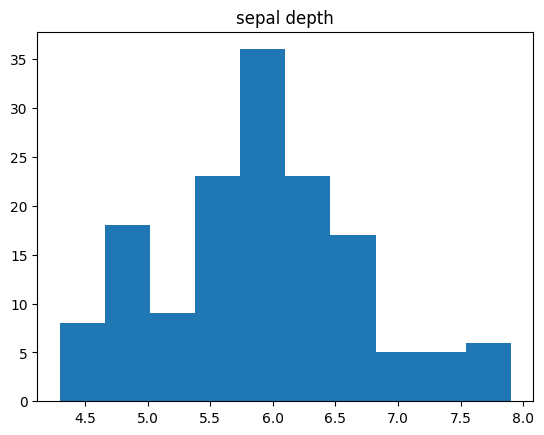

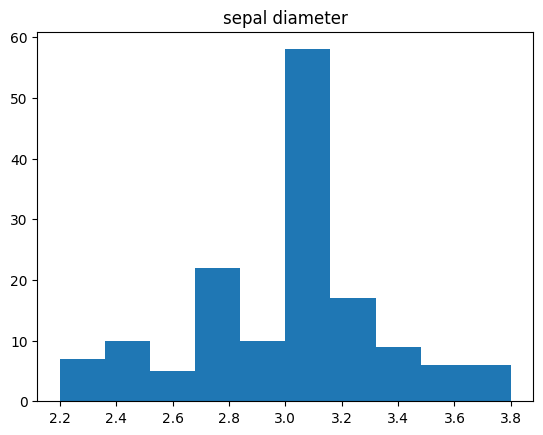

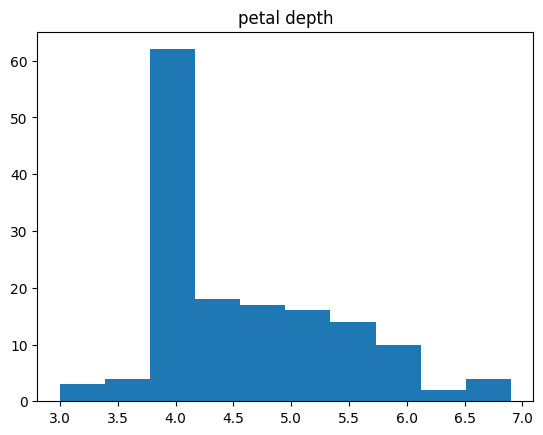

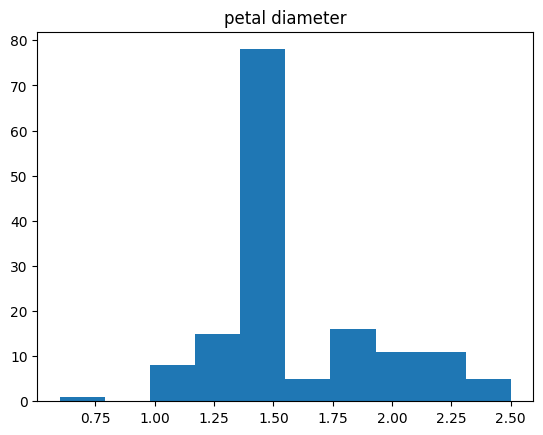

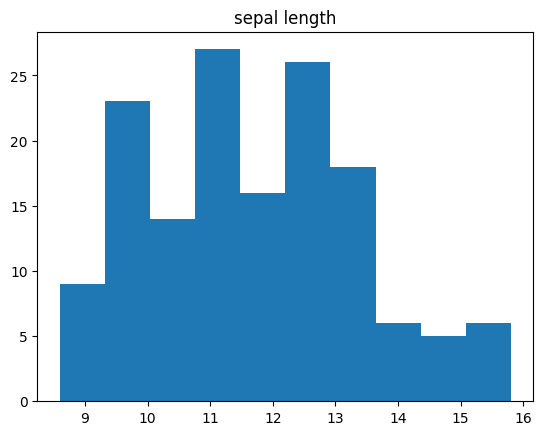

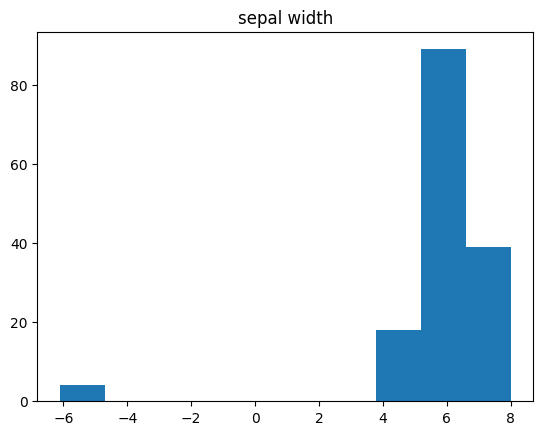

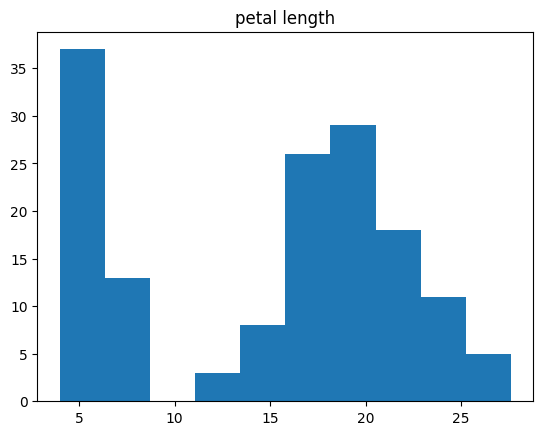

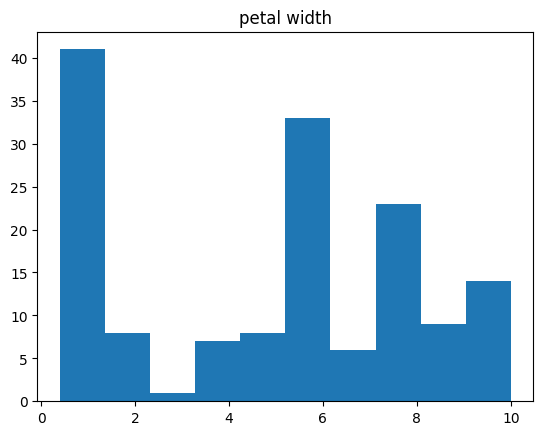

In [9]:
## check karna ka liya positions of the data points ##
import matplotlib.pyplot as plt
for stuff in df.columns[:-1]:
    plt.hist(df[stuff])
    plt.title(stuff)
    plt.show()

In [10]:
 ## Now ab mai data ko normalize kar rha 0 to 1 ki range mai ##
## except the target col ###
scaler = MinMaxScaler()
Normalizecol = [col for col in df.columns if col != 'target']
df[Normalizecol] = scaler.fit_transform(df[Normalizecol])
df


,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,0.444872,0.503365,0.285996,0.448947,0.222222,0.929118,0.067797,0.041667,0
1,0.166667,0.500000,0.285996,0.448947,0.166667,0.858236,0.067797,0.041667,0
2,0.111111,0.625000,0.285996,0.448947,0.111111,0.886589,0.050847,0.041667,0
3,0.083333,0.503365,0.285996,0.448947,0.083333,0.872413,0.084746,0.041667,0
4,0.444872,0.875000,0.285996,0.448947,0.194444,0.943295,0.067797,0.041667,0
...,...,...,...,...,...,...,...,...,...
145,0.666667,0.500000,0.564103,0.894737,0.666667,0.858236,0.711864,0.916667,2
146,0.555556,0.187500,0.512821,0.684211,0.555556,0.787355,0.677966,0.750000,2
147,0.611111,0.500000,0.564103,0.736842,0.611111,0.858236,0.711864,0.791667,2
148,0.527778,0.750000,0.615385,0.894737,0.527778,0.914942,0.745763,0.916667,2


In [ ]:
###  Filter method ##
## 1 Low variance ##
from sklearn.feature_selection import VarianceThreshold
target_col = 'target'
Normalizecol = [col for col in df.columns if col != target_col]
threshold = 0.1 
selector = VarianceThreshold(threshold)
low_variance_cols = selector.fit_transform(df[Normalizecol])
Desiredcol = df[Normalizecol].columns[selector.get_support()]

# Display the columns selected after low variance filter
print('Col select with variance threshold:')
print(Desiredcol)

Col select with variance threshold:
Index(['petal width'], dtype='object')


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

selFeatures = ['petal width']

# Assuming 'target' is the target column
target_col = 'target'

# Prepare the features and target
X = df[selFeatures]
y = df[target_col]

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy in percentage
accuracy_percentage = accuracy * 100
print('Accuracy:',accuracy_percentage)


Accuracy: 100.0


In [13]:
## 2 Peron's Corelation ##
target_col = 'target'
corr_matrix = df.drop(columns=[target_col]).corr().abs()

corr_threshold = 0.5 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))   # yaha pa hum nah upper triangle la liya hai confusion matrix ka 
high_corr_cols = [column for column in upper.columns if any(upper[column] > corr_threshold)]

# Display the columns selected based on Pearson's correlation excluding the target column
print("Feathures selected by Pearson's Correlation Filter")
print(high_corr_cols)

Feathures selected by Pearson's Correlation Filter
['petal depth', 'petal diameter', 'sepal length', 'petal length', 'petal width']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Selected features based on Pearson's correlation filter
selFeatures = ['petal depth', 'petal diameter', 'sepal length','petal length', 'petal width']
target_col = 'target'

X = df[selFeatures]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy in percentage
accuracy_percentage = accuracy * 100
print('Accuracy:',accuracy_percentage)


Accuracy: 100.0


In [15]:
## 3 Information Gain ##
from sklearn.feature_selection import mutual_info_classif

X = df.drop('target', axis=1)
y = df['target']


mi = mutual_info_classif(X, y)

mi_series = pd.Series(mi, index=X.columns)
selected_columns_mi = mi_series.sort_values(ascending=False).index[:len(high_corr_cols)]


print("Cols selected by Mutual Information:")
print(selected_columns_mi)


Cols selected by Mutual Information:
Index(['petal length', 'petal width', 'petal depth', 'petal diameter',
       'sepal length'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Selected features based on Pearson's correlation filter
selected_features_corr = ['petal depth', 'petal width', 'petal depth', 'petal diameter', 'sepal length', 'sepal depth']

# Assuming 'target' is the target column
target_col = 'target'

# Prepare the features and target
X = df[selected_features_corr]
y = df[target_col]

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy in percentage
accuracy_percentage = accuracy * 100
print('Accuracy:',accuracy_percentage)

Accuracy: 100.0


In [17]:
### Wrapper Method ##
## 1 Forward selection ##
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

target_col = 'target'

X = df.drop(columns=[target_col])
y = df[target_col]

lr = LinearRegression()
forward_selector = SequentialFeatureSelector(lr, n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)

selected_feature_indices = forward_selector.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]

print("Features selected by Forward Selection:")
print(selected_features)



Features selected by Forward Selection:
Index(['sepal diameter', 'petal depth', 'sepal length', 'petal length',
       'petal width'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Selected features based on Pearson's correlation filter
selected_features_corr = ['petal depth', 'sepal diameter', 'sepal length',
                          'petal length', 'petal width']

target_col = 'target'

X = df[selected_features_corr]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy in percentage
accuracy_percentage = accuracy * 100
print('Accuracy:',accuracy_percentage)

Accuracy: 100.0


In [25]:

## 2 Backward Elimination ##
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

target_col = 'target'

X = df.drop(columns=[target_col])
y = df[target_col]

rf = RandomForestClassifier()
backward_selector = RFE(rf, n_features_to_select=4, step=1)
backward_selector = backward_selector.fit(X, y)

selected_features_backward = X.columns[backward_selector.support_]

print("Features selected by Backward Elimination:")
print(selected_features_backward)


Features selected by Backward Elimination:
Index(['petal depth', 'petal diameter', 'petal length', 'petal width'], dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

selected_features_corr = ['petal depth', 'petal diameter', 'sepal length','petal length', 'petal width']

target_col = 'target'

X = df[selected_features_corr]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy in percentage
accuracy_percentage = accuracy * 100
print('Accuracy:',accuracy_percentage)

Accuracy: 100.0
